In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pred_sa1_geo = gpd.read_file("Assigned_Pop\pred_sa1_geo.geojson")

In [3]:
synthetic = pd.read_csv("Data\clean_data.csv")
corr_df = pd.read_csv('Data\\feature_selection\\att_rank_pearson.csv')[["key", "pearson_score", "p_value"]].dropna()

In [4]:
pred_ev_sa1 = pred_sa1_geo[["SA1_CODE21", "int_evs"]]
pred_ev_sa1["SA1_CODE21"] = pred_ev_sa1["SA1_CODE21"].astype(str)
synthetic["SA1_CODE21"] = synthetic["SA1_CODE21"].astype(str)
synthetic = synthetic.merge(pred_ev_sa1, on="SA1_CODE21", how="left")

C:\Users\danla\AppData\Local\Temp\ipykernel_18288\3619351494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_ev_sa1["SA1_CODE21"] = pred_ev_sa1["SA1_CODE21"].astype(str)


In [68]:
synthetic_bins = synthetic.copy()

inc_bins = [-1, 0, 149, 299, 399, 499, 649, 799, 999, 1249, 1499, 1749, 1999, 2499, 2999, 3499, 3999, 4499, 4999, 5999, 7999, np.inf]
hhsize_bins = [1, 2, 3, 4, 5, 6, 7, np.inf]
vehs_bins = [-1, 0, 1, 2, 3, np.inf]
synthetic_bins["INC_bins"] = pd.cut(synthetic_bins["INC"], bins=inc_bins)
synthetic_bins["HHSIZE_bins"] = pd.cut(synthetic_bins["HHSIZE"], bins=hhsize_bins)
synthetic_bins["TOTALVEHS_bins"] = pd.cut(synthetic_bins["TOTALVEHS"], bins=vehs_bins)

#synthetic_bins = synthetic_bins.drop(columns=["HHSIZE", "TOTALVEHS", "INC", "HHSIZE_normalised", "TOTALVEHS_normalised", "INC_normalised"])
synthetic_bins = synthetic_bins.drop(columns=["HHSIZE", "TOTALVEHS", "INC"])
synthetic_bins = pd.get_dummies(synthetic_bins, columns=['INC_bins'], prefix='INC')
synthetic_bins = pd.get_dummies(synthetic_bins, columns=['HHSIZE_bins'], prefix='HHSIZE')
synthetic_bins = pd.get_dummies(synthetic_bins, columns=['TOTALVEHS_bins'], prefix='TOTALVEHS')

In [69]:
# Your dictionary data
multiplier_df = corr_df

# Sample DataFrame to be multiplied
df = synthetic_bins.drop(columns=["SA1_CODE21"])

# Create a dictionary from the multiplier DataFrame
multiplier_dict = dict(zip(multiplier_df['key'], multiplier_df['pearson_score']))

In [7]:
df_result = df * df.columns.map(multiplier_dict)
df_result["score"] = df_result.sum(axis=1)
df_result[["SA1_CODE21"]] = synthetic_bins[["SA1_CODE21"]]
df_result["house_id"] = df_result.index

df_result["assign_ev"] = 0
df_result.sort_values(by="score", ascending=False, inplace=True)

move_columns = ["house_id", "score", "assign_ev", "SA1_CODE21"]

df_result = df_result[move_columns + [col for col in df_result.columns if col not in move_columns]]
df_result

,house_id,score,assign_ev,SA1_CODE21,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,...,"HHSIZE_(3.0, 4.0]","HHSIZE_(4.0, 5.0]","HHSIZE_(5.0, 6.0]","HHSIZE_(6.0, 7.0]","HHSIZE_(7.0, inf]","TOTALVEHS_(-1.0, 0.0]","TOTALVEHS_(0.0, 1.0]","TOTALVEHS_(1.0, 2.0]","TOTALVEHS_(2.0, 3.0]","TOTALVEHS_(3.0, inf]"
1350556,1350556,0.667979,0,21203155710,0.0,-0.0,-0.000000,0.079414,0.119079,0.0,...,0.0,0.0,0.0,0.0,0.173777,0.0,0.0,0.09801,-0.0,-0.000000
213648,213648,0.667979,0,20604111723,0.0,-0.0,-0.000000,0.079414,0.119079,0.0,...,0.0,0.0,0.0,0.0,0.173777,0.0,0.0,0.09801,-0.0,-0.000000
74967,74967,0.667979,0,20302148648,0.0,-0.0,-0.000000,0.079414,0.119079,0.0,...,0.0,0.0,0.0,0.0,0.173777,0.0,0.0,0.09801,-0.0,-0.000000
609946,609946,0.667979,0,20802117838,0.0,-0.0,-0.000000,0.079414,0.119079,0.0,...,0.0,0.0,0.0,0.0,0.173777,0.0,0.0,0.09801,-0.0,-0.000000
1033715,1033715,0.667979,0,21005154522,0.0,-0.0,-0.000000,0.079414,0.119079,0.0,...,0.0,0.0,0.0,0.0,0.173777,0.0,0.0,0.09801,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267301,267301,-0.528693,0,20604150807,0.0,-0.0,-0.085829,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,-0.0,-0.066105
311379,311379,-0.528693,0,20605151202,0.0,-0.0,-0.085829,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,-0.0,-0.066105
440039,440039,-0.528693,0,20701115502,0.0,-0.0,-0.085829,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,-0.0,-0.066105
326046,326046,-0.528693,0,20605151416,0.0,-0.0,-0.085829,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,-0.0,-0.066105


In [73]:
df_result[df_result["assign_ev"] == 1].mean()

house_id                       9.667909e+05
score                          5.272550e-01
assign_ev                      1.000000e+00
SA1_CODE21                              inf
dwelltype_Flat or Apartment    3.023719e-02
dwelltype_Other               -4.413015e-04
dwelltype_Separate House      -7.138505e-03
dwelltype_Terrace/Townhouse    4.001053e-02
owndwell_Being Purchased       6.936307e-02
owndwell_Being Rented          2.888819e-02
owndwell_Fully Owned          -1.024293e-04
owndwell_Occupied Rent-Free             NaN
owndwell_Something Else        0.000000e+00
int_evs                                 NaN
INC_(-1.0, 0.0]                2.568088e-04
INC_(0.0, 149.0]              -1.027434e-05
INC_(149.0, 299.0]            -1.416730e-05
INC_(299.0, 399.0]            -1.089286e-05
INC_(399.0, 499.0]             0.000000e+00
INC_(499.0, 649.0]            -1.094291e-05
INC_(649.0, 799.0]            -1.873379e-05
INC_(799.0, 999.0]            -1.656086e-05
INC_(999.0, 1249.0]           -3

## Run to generate ev_pop

In [61]:
# def assign_ev_by_sa1(df, sa1_code, x):
#     mask = df['SA1_CODE21'] == sa1_code
#     rows_to_assign = np.where(mask)[0][:x]
#     df.loc[rows_to_assign, 'assign_ev'] = 1


# # Create a dictionary to store the required x values for each SA1_CODE21
# x_values_dict = dict(zip(pred_ev_sa1['SA1_CODE21'], pred_ev_sa1['int_evs']))

# # Loop through unique SA1_CODE21 values and update 'assign_ev' in a vectorized way
# i = 0
# df_result.reset_index(drop=True, inplace=True)

# for sa1_code in df_result['SA1_CODE21'].unique():
#     if i %100 == 0:
#        print(i)
        
#     i += 1
#     x_value = x_values_dict.get(sa1_code, 0)
    
#     if x_value > 0:
#         assign_ev_by_sa1(df_result, sa1_code, x_value)

# # Reset the index of df_result if needed
# df_result.reset_index(drop=True, inplace=True)
# df_result.to_csv("Assigned_Pop\ev_assign_pop.csv", index=False)

In [66]:
df_result.sort_values(by="house_id")[["house_id", "score", "assign_ev"]]["assign_ev"].sum()

6673

In [67]:
assigned_pop["assign_ev"].sum()

6673.0

In [71]:
len(df_result), len(synthetic), len(assigned_pop)

(1901074, 1901074, 1901074)

In [62]:
ev_assignement = df_result.sort_values(by="house_id")[["house_id", "score", "assign_ev"]]
assigned_pop = synthetic.copy()
assigned_pop["house_id"] = range(1, len(synthetic) + 1)
assigned_pop = assigned_pop.merge(ev_assignement, on='house_id', how="left")
assigned_pop.to_csv("Assigned_Pop\\assigned_pop.csv", index=False)

# Plotting 

In [29]:
sa1 = gpd.read_file("Shape\sa1_to_poa.gpkg")
ev_pop = pd.read_csv("Assigned_Pop\ev_assign_pop.csv")

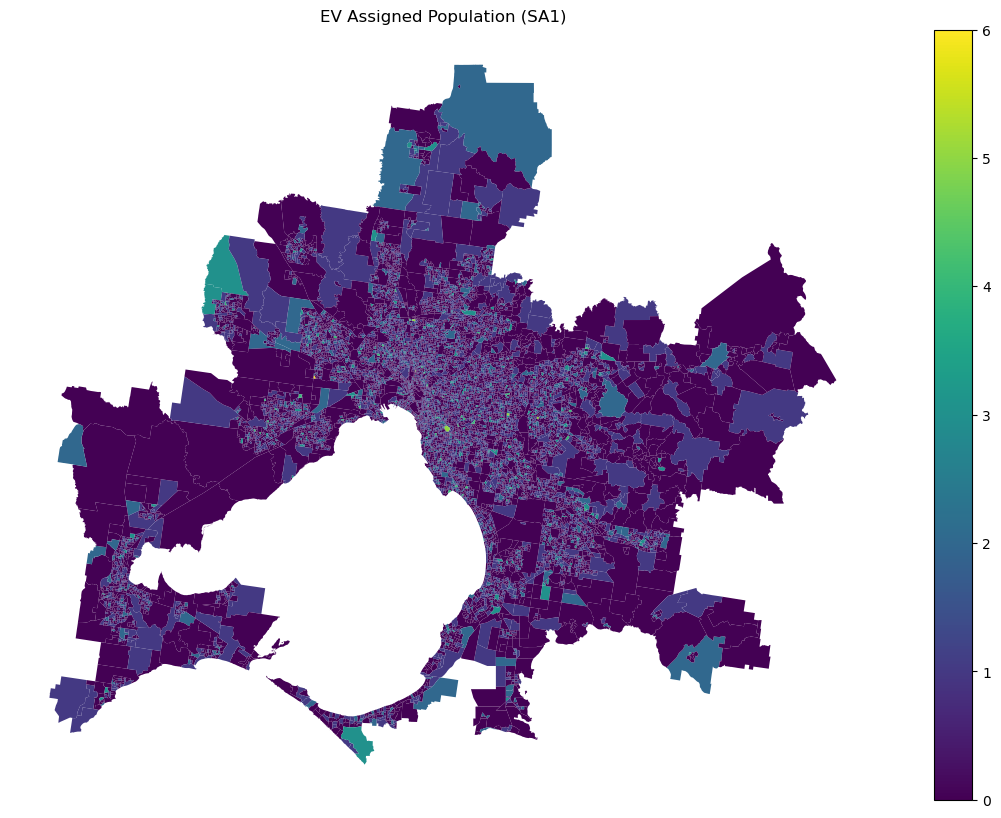

In [42]:
sa1["SA1_CODE21"] = sa1["SA1_CODE21"].astype(str)
ev_pop["SA1_CODE21"] = ev_pop["SA1_CODE21"].astype(str)
merged = sa1.merge(ev_pop.groupby("SA1_CODE21").sum("assign_ev"), on="SA1_CODE21", how="left")
merged["assign_ev"].fillna(0, inplace=True)

# Create a larger figure

fig, ax1 = plt.subplots(figsize=(15, 10))
merged.plot(column="assign_ev", legend=True, cmap='viridis', ax=ax1)
plt.title("EV Assigned Population (SA1)")
plt.axis('off')
plt.show()

In [43]:
merged

,SA1_CODE21,CHG_FLAG21,CHG_LBL21,SA2_CODE21,SA2_NAME21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,...,"HHSIZE_(3.0, 4.0]","HHSIZE_(4.0, 5.0]","HHSIZE_(5.0, 6.0]","HHSIZE_(6.0, 7.0]","HHSIZE_(7.0, inf]","TOTALVEHS_(-1.0, 0.0]","TOTALVEHS_(0.0, 1.0]","TOTALVEHS_(1.0, 2.0]","TOTALVEHS_(2.0, 3.0]","TOTALVEHS_(3.0, inf]"
0,20102100908,0,No change,201021009,Bacchus Marsh Surrounds,20102,Creswick - Daylesford - Ballan,201,Ballarat,2RVIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20102100910,0,No change,201021009,Bacchus Marsh Surrounds,20102,Creswick - Daylesford - Ballan,201,Ballarat,2RVIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20301103507,0,No change,203011035,Golden Plains - South,20301,Barwon - West,203,Geelong,2RVIC,...,2.855857,2.008909,0.109337,0.133334,0.347555,0.352863,0.827123,4.704456,-0.595230,-0.462736
3,20301103607,0,No change,203011036,Winchelsea,20301,Barwon - West,203,Geelong,2RVIC,...,3.725030,2.008909,0.218674,0.000000,1.390219,0.411674,2.220172,6.174599,-0.595230,-1.123788
4,20301103608,0,No change,203011036,Winchelsea,20301,Barwon - West,203,Geelong,2RVIC,...,1.614180,1.291441,0.000000,0.133334,0.347555,0.176432,1.393049,3.038295,-0.344607,-0.330526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11946,21402159219,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,2.607521,0.860961,0.000000,0.000000,0.000000,1.411454,4.396810,6.370618,-0.563902,-0.330526
11947,21402159220,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,3.849198,1.578428,0.109337,0.133334,0.173777,1.940749,5.310999,9.800950,-0.720541,-0.528841
11948,21402159221,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,0.993341,0.000000,0.000000,0.000000,0.000000,1.646696,4.919204,5.782561,-0.407262,-0.132210
11949,21402159222,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,4.842539,1.291441,0.000000,0.000000,0.000000,0.999780,5.615728,10.389007,-0.845853,-0.462736
